In [129]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from scipy.stats import skew, skewtest, pearsonr, spearmanr, normaltest, levene, norm, t, ttest_ind
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, OneHotEncoder
from sklearn.feature_selection import mutual_info_classif, SelectKBest, VarianceThreshold
from sklearn.impute import SimpleImputer, KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import itertools

2023-02-16 11:03:59.225806: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [37]:
!ls -la

total 7388616
drwxr-xr-x  6 tugus  staff         192 Feb 15 10:43 .
drwxr-xr-x@ 6 tugus  staff         192 Feb  6 17:48 ..
drwxr-xr-x  3 tugus  staff          96 Feb 10 09:18 .ipynb_checkpoints
-rw-r--r--@ 1 tugus  staff      502298 Feb 15 10:43 FDS_ANN.ipynb
-rw-r--r--@ 1 tugus  staff  1743292229 Feb  6 18:26 merged_test.pkl
-rw-r--r--@ 1 tugus  staff  2039170836 Feb  6 18:07 merged_train.pkl


In [71]:
%%time 
train_data = pd.read_pickle("merged_train.pkl")
test_data = pd.read_pickle("merged_test.pkl")

CPU times: user 1.48 s, sys: 2.84 s, total: 4.32 s
Wall time: 5.38 s


In [72]:
train_data.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1

In [73]:
test_data.head()

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,170.0,87.0,1.0,NaN,gmail.com,NaN,6.0,6.0,0.0,0.0,3.0,4.0,0.0,0.0,6.0,0.0,5.0,1.0,115.0,6.0,419.0,419.0,27.0,398.0,27.0,NaN,NaN,NaN,NaN,418.0,203.0,NaN,NaN,NaN,409.0,T,T,F,NaN,NaN,F,T,T,T,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,47.950001,0.000000,0.000000,47.950001,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0

In [56]:
train_data.shape

(590540, 351)

## Utility Functions

In [6]:
def cat_num_features(df):
    
    '''
        Get the names of Categorical Features and 
        Numerical Features of the given Dataset.
    '''
    
    catf = []
    numf = []
    
    # Given Categorical Features 
    catf = ['ProductCD', 
            'card1', 'card2', 'card3', 'card4', 'card5','card6', 
            'addr1', 'addr2', 
            'P_emaildomain', 'R_emaildomain', 
            'M1', 'M2','M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
            'DeviceType', 'DeviceInfo'
           ]
    catf+=['id_'+str(i) for i in range(12,39)]


    # Updating the Categorical Feature Names List based on the columns present in the dataframe
    catf = [feature for feature in catf if feature in df.columns.values]
    numf = [feature for feature in df.columns if feature not in catf and not feature == 'isFraud']
    
    return (catf, numf)

In [7]:
def one_hot_encoding(X_train, X_test, catf):
  '''
    Encode categorical features using one hot encoding
  '''

  ohe = OneHotEncoder(handle_unknown='ignore')
  X_train_trf = pd.DataFrame(ohe.fit_transform(X_train).toarray(), columns=ohe.get_feature_names_out(X_train[catf]))
  X_test_trf = pd.DataFrame(ohe.fit_transform(X_test).toarray(), columns=ohe.get_feature_names_out(X_test[catf]))

  return (X_train_trf, X_test_trf)


In [17]:
def compute_vif(df, features):
    
    '''
        Utility Function to compute Variance Inflation Factor for given features in a dataframe.
    '''
    
    data = df[features]
    vif = {column:variance_inflation_factor(data.values, idx) for idx, column in enumerate(features)}
    return vif

In [9]:
def remove_feature_based_on_vif(train_df, vif_dict):
    
    '''
        Utility Function to remove the feature based on vif value from train and test set and return 
        the updated list of features among which VIF is being computed.
        
        Those features which have the vif value >= 10 will be continuosly 
        removed one by one until no such feature is left.  
    '''

    features_to_be_discarded = []

    train = copy.deepcopy(train_df)
    rf = max(vif_dict, key=vif_dict.get) # Getting the feature with max vif value
    thr = vif_dict[rf] # Storing the vif value of that feature
    
    # Checking if the largest vif value if greater than or equal to 10
    while(thr>=10):
        features_to_be_discarded.append(rf) 
        vif_dict.pop(rf) # Removing the feature and its vif value from the vif dictionary
        features = list(vif_dict.keys()) # Updated list of features
        train = train_df.drop(columns=rf, axis=1) # Removing the feature from train dataset
        if(len(features)==1):
            break # break if only one feature remains 
        
        vif_dict = compute_vif(train, features) # Recomputing the VIF values
        rf = max(vif_dict, key=vif_dict.get) 
        thr = vif_dict[rf]
      
    del train
        
        
    return features_to_be_discarded

In [98]:
def drop_by_spearman(train_df, thresh):
    feature_comb = itertools.combinations(train_df.columns, 2)
    neg_thresh = -1 * thresh
    drop = []
    for a, b in feature_comb:
        coef, pvalue = spearmanr(train_df[a], train_df[b])
        if pvalue < 0.05:
            if coef > thresh:
                drop.append(b)
            elif coef < neg_thresh:
                drop.append(b)
                
    return list(set(drop))

In [110]:
def drop_by_pearson(train_df, thresh):
    feature_comb = itertools.combinations(train_df.columns, 2)
    neg_thresh = -1 * thresh
    drop = []
    for a, b in feature_comb:
        coef, pvalue = pearsonr(train_df[a], train_df[b])
        if pvalue < 0.05:
            if coef > thresh:
                drop.append(b)
            elif coef < neg_thresh:
                drop.append(b)
                
    return list(set(drop))

In [ ]:
def backward_feature_selection_ann(train_df, features):
# Assume X_train and y_train are your input and output data, respectively

# Define a neural network with all the features
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam')

# Train the network with all the features
model.fit(X_train, y_train, validation_split=0.2, epochs=10)

# Evaluate the performance of the network
val_loss, val_acc = model.evaluate(X_val, y_val)

# Perform backward feature selection
n_features = X_train.shape[1]
features = np.arange(n_features)
best_features = features

while len(best_features) > 1:
    best_loss = val_loss
    for feature in features:
        # Remove one feature
        subset = best_features[best_features != feature]
        X_train_subset = X_train[:, subset]
        X_val_subset = X_val[:, subset]
        
        # Train the network with the subset of features
        model = tf.keras.models.Sequential([
            tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train_subset.shape[1],)),
            tf.keras.layers.Dense(64, activation='relu'),
            tf.keras.layers.Dense(1)
        ])
        model.compile(loss='mse', optimizer='adam')
        model.fit(X_train_subset, y_train, validation_split=0.2, epochs=10, verbose=0)
        
        # Evaluate the performance of the network
        loss, acc = model.evaluate(X_val_subset, y_val, verbose=0)
        
        # Update the best features if the performance improved
        if loss < best_loss:
            best_loss = loss
            best_features = subset
    
    # Stop if no improvement was made
    if set(best_features) == set(features):
        break

print(best_features)


## Data Cleaning

In [74]:
# Storing categorical and numerical features

catf, numf = cat_num_features(train_data)

In [75]:
print('Number of categorical features: ' + str(len(catf)))
print('Number of numerical features: ' + str(len(numf)))

Number of categorical features: 49
Number of numerical features: 383


### Removing Redundant Features

Akan dilakukan penghapusan fitur untuk fitur yang

*   Memiliki >90% missing values
*   Memiliki value yang konstan untuk setiap baris
*   Memiliki >90% value yang sama





In [76]:
# Removing redundant features

null_90_train = [f for f in train_data.columns if train_data[f].isna().sum()/len(train_data) > 0.9]
null_90_test = [f for f in test_data.columns if test_data[f].isna().sum()/len(test_data) > 0.9]

one_value_features_train = [f for f in train_data.columns if train_data[f].nunique()<=1]
one_value_features_test = [f for f in test_data.columns if test_data[f].nunique()<=1]

constant_value_features_train = [f for f in train_data.columns if train_data[f].value_counts(dropna=False, normalize=True).values[0] > 0.9]
constant_value_features_test = [f for f in test_data.columns if test_data[f].value_counts(dropna=False, normalize=True).values[0] > 0.9]

In [79]:
drop_cols = list(set(null_90_train + null_90_test + one_value_features_train + one_value_features_test + constant_value_features_train + constant_value_features_test))

if 'isFraud' in drop_cols:
  # exclude target feature
  drop_cols.remove('isFraud')

train_data.drop(drop_cols, axis=1, inplace=True)
test_data.drop(drop_cols, axis=1, inplace=True)

In [80]:
catf, numf = cat_num_features(train_data)
cat_features_indices = [train_data.columns.get_loc(f) for f in catf]

In [81]:
print('Number of categorical features after removal: ' + str(len(catf)))
print('Number of numerical features after removal: ' + str(len(numf)))

Number of categorical features after removal: 41
Number of numerical features after removal: 309


## Imputing Missing Values

- missing value ≤10% gunakan simple imputer yaitu median untuk kolom numerik dan modus untuk kolom kategorik
-  missing value >10% dan ≤30% gunakan KNNImputer atau
-  missing value >30% drop kolom

In [34]:
median_imputer = SimpleImputer(strategy='median')
mode_imputer = SimpleImputer(strategy='most_frequent')
knn_imputer = KNNImputer(n_neighbors=5)

## Checking Multicolinearity

Multicollinearity is the occurrence of high intercorrelations among two or more independent variables in a multiple regression model. Multicollinearity can lead to skewed or misleading results when a researcher or analyst attempts to determine how well each independent variable can be used most effectively to predict or understand the dependent variable in a statistical model.

### C Features

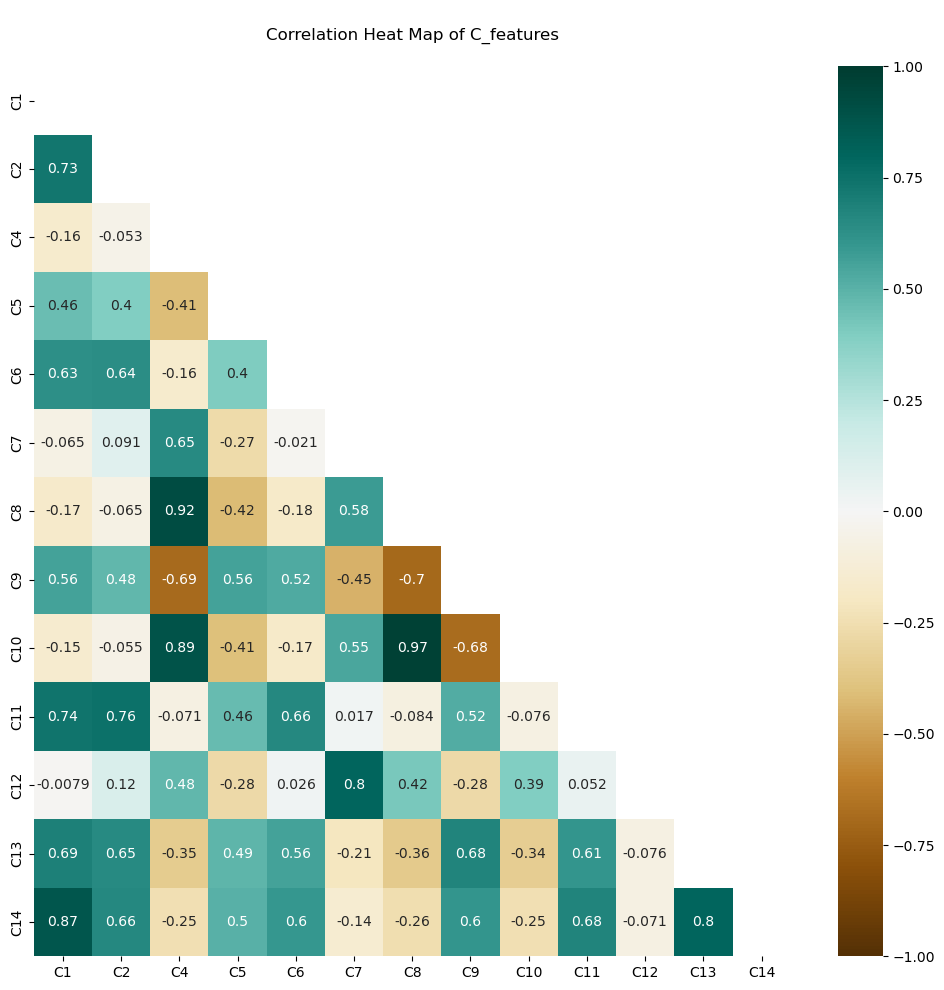

In [66]:
c_features = ["C"+str(i) for i in range(1,15) if "C"+str(i) in train_data.columns]

plt.figure(figsize=(10,10))
mask = np.triu(np.ones_like(train_data[c_features].corr(), dtype=bool))
sns.color_palette("crest", as_cmap=True)
sns.heatmap(train_data[c_features].corr(method='spearman'), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');
plt.title('\nCorrelation Heat Map of C_features\n')
plt.tight_layout()
plt.show()

Removing features using Spearman, with 0.9 threshold

In [118]:
drop_c = drop_by_spearman(train_data[c_features], 0.9)
drop_c

['C10', 'C8']

In [119]:
train_data.drop(drop_c, axis=1, inplace=True)
test_data.drop(drop_c, axis=1, inplace=True)

### D Features

<Figure size 1000x1000 with 0 Axes>

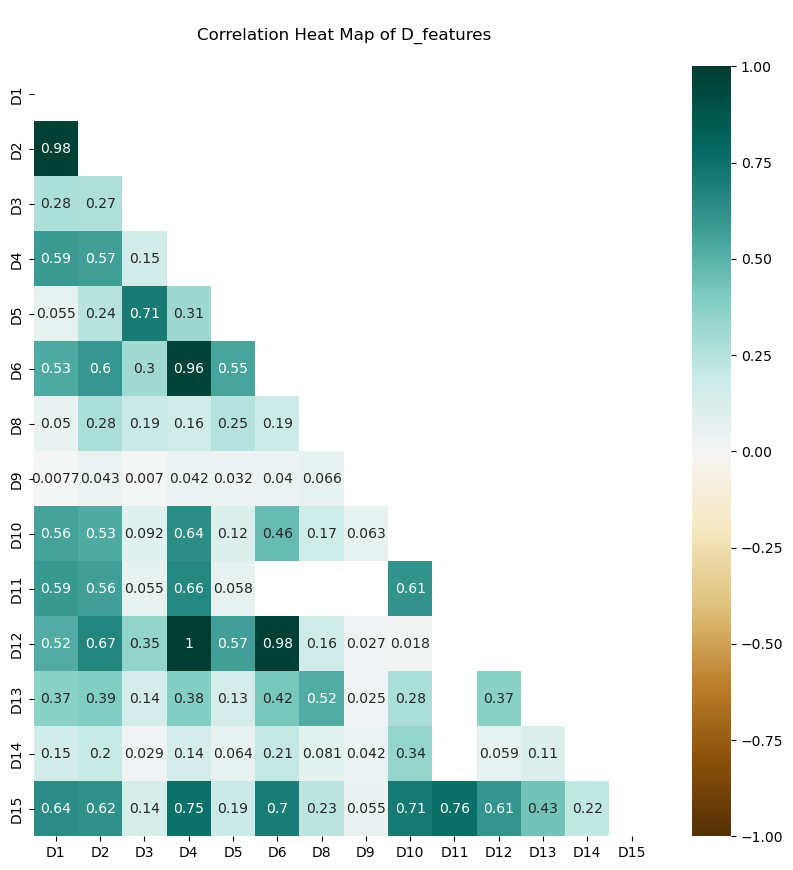

In [121]:
d_features = ["D"+str(i) for i in range(1,16) if "D"+str(i) in train_data.columns]

plt.figure(figsize=(10,10))

mask = np.triu(np.ones_like(train_data[d_features].corr(), dtype=bool))
plt.figure(figsize=(10,10))
sns.color_palette("crest", as_cmap=True)
sns.heatmap(train_data[d_features].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');
plt.title('\nCorrelation Heat Map of D_features\n')
plt.show()

In [123]:
drop_d = drop_by_spearman(train_data[d_features], 0.9)
drop_d

[]

### id numerical features

In [124]:
id_num_features = ['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11']
id_num_features = [f for f in id_num_features if f in train_data.columns]

<Figure size 1000x1000 with 0 Axes>

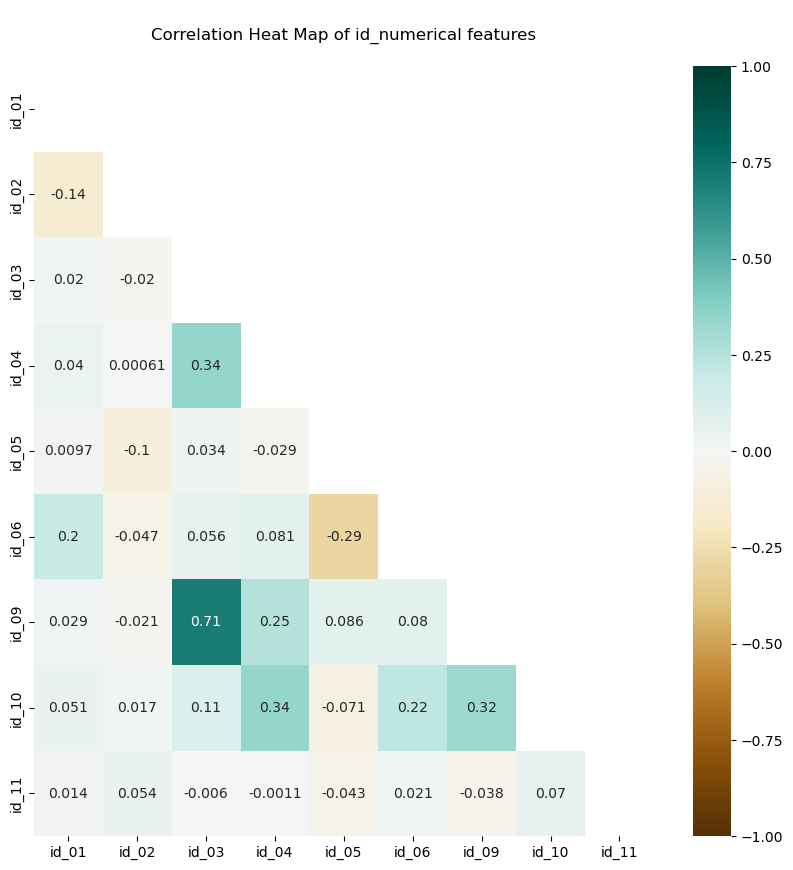

In [126]:
plt.figure(figsize=(10,10))

mask = np.triu(np.ones_like(train_data[id_num_features].corr(), dtype=bool))
plt.figure(figsize=(10,10))
sns.color_palette("crest", as_cmap=True)
sns.heatmap(train_data[id_num_features].corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG');
plt.title('\nCorrelation Heat Map of id_numerical features\n')
plt.show()

In [128]:
drop_id = drop_by_spearman(train_data[id_num_features], 0.9)
drop_id

[]